In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('crpdata.csv')
df.head()

,N,P,K,ph,label
0,143,69,217,5.9,pomegranate
1,170,36,216,5.9,pomegranate
2,158,66,219,6.8,pomegranate
3,133,45,207,6.4,pomegranate
4,132,48,218,6.7,pomegranate


In [3]:
df.dtypes

N          int64
P          int64
K          int64
ph       float64
label     object
dtype: object

<AxesSubplot:>

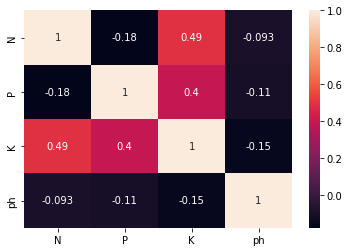

In [4]:
sns.heatmap(df.corr(),annot=True)

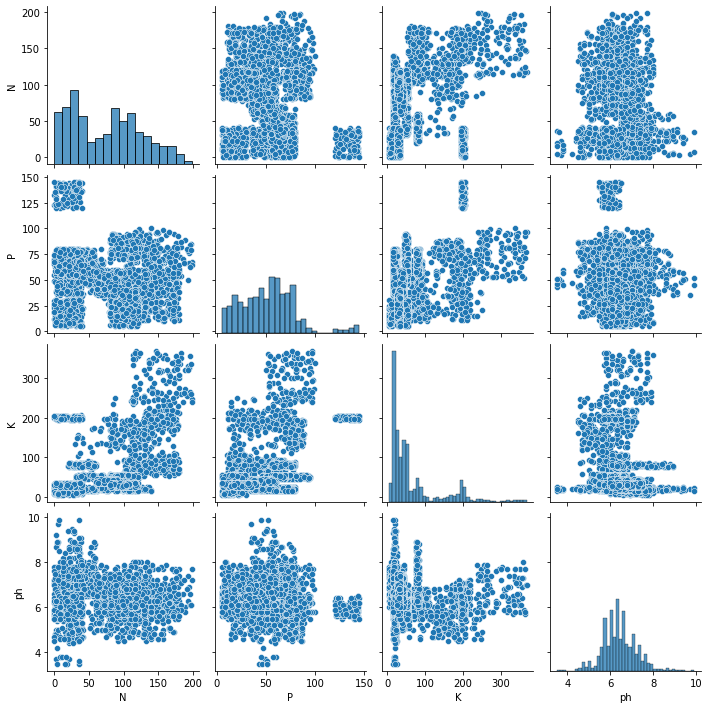

In [5]:
sns.pairplot(df)

In [6]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [7]:
X

array([[143. ,  69. , 217. ,   5.9],
       [170. ,  36. , 216. ,   5.9],
       [158. ,  66. , 219. ,   6.8],
       ...,
       [118. ,  33. ,  30. ,   6.4],
       [117. ,  32. ,  34. ,   6.8],
       [104. ,  18. ,  30. ,   6.8]])

In [8]:
y

array(['pomegranate', 'pomegranate', 'pomegranate', ..., 'coffee',
       'coffee', 'coffee'], dtype=object)

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [10]:
y

array([20, 20, 20, ...,  5,  5,  5])

In [11]:
le.classes_

array(['apple', 'banana', 'blackgram', 'chickpea', 'coconut', 'coffee',
       'cotton', 'grapes', 'jute', 'kidneybeans', 'lentil', 'maize',
       'mango', 'mothbeans', 'mulberry', 'mungbean', 'muskmelon',
       'orange', 'papaya', 'pigeonpeas', 'pomegranate', 'potato', 'ragi',
       'rice', 'watermelon'], dtype=object)

In [12]:
le.transform(['apple', 'banana', 'blackgram', 'chickpea', 'coconut', 'coffee',
       'cotton', 'grapes', 'jute', 'kidneybeans', 'lentil', 'maize',
       'mango', 'mothbeans', 'mulberry', 'mungbean', 'muskmelon',
       'orange', 'papaya', 'pigeonpeas', 'pomegranate', 'potato', 'ragi',
       'rice', 'watermelon'])

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24])

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:, [0,1,2,3]] = sc.fit_transform(X_train[:,[0,1,2,3] ])
X_test[:,  [0,1,2,3]] = sc.transform(X_test[:,  [0,1,2,3]])

In [15]:
X_train

array([[-0.30572917, -0.31562834, -0.65324048, -0.91411584],
       [-1.31688659, -1.52506645, -0.82496034, -0.53109155],
       [ 0.80456132,  0.64480781, -0.3362192 , -0.0203925 ],
       ...,
       [-0.88070104,  0.11123217, -0.65324048, -0.91411584],
       [ 0.72525486, -0.81363227,  0.21856804, -0.0203925 ],
       [-1.33671321,  0.2179473 , -0.71928658, -0.27574202]])

In [16]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [17]:
print(classifier.predict(sc.transform([[143,69,217,5.9]])))

[20]


In [18]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[ 3  3]
 [23  8]
 [18 18]
 ...
 [ 9  9]
 [10 10]
 [ 9  9]]


In [19]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[12  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0 17  0  0  0  0  0  0  0  1  0  0  0  0  1  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0 22  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0 15  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0 21  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0 27  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0 21  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  1  0  0 13  0  0  0  0  0  0  0  0  0  0  0  0  0  0  8
   0]
 [ 0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  1  0  0  0  0
   0]
 [ 0  0  6  0  0  0  0  0  0  1 13  0  0  0  0  0  0  0  0  6  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0  0 21  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  1  0  0  0  0 15

0.8472222222222222

In [20]:
import pickle

In [21]:
pickle.dump(classifier,open('clsmodel.pkl','wb'))

In [23]:
pickled_model=pickle.load(open('clsmodel.pkl','rb'))

In [24]:
pickled_model.predict(sc.transform([[143,69,217,5.9]]))

array([20])